# Notebook to where data is analysed and dataframe used for the models is exported 

### This Notebook is run in order to get the dataframe for line-list

In [1]:
%matplotlib inline
%load_ext autoreload

%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

In [2]:
import sys
sys.path.append('STUDIES')
from proj2_HELPERS_ import *

We have two files, one with daily observation and one with the patients info. 

In [3]:
df_linelist = pd.read_csv('../../Original dataset/EGOYQN_Gueckedou_linelist_cleaned_pos_and_neg_2019_November_ANSI.csv', encoding = 'ISO-8859-1')
df_linelist.head()

,msfid,mcid,datmac,transit,admis,gkdid,datgck,age,sex,respref,...,pcr2ct,epistat,commun,currstat,exdat,outold,outcome,locdec,condat,source
0,G1,Absent,01/01/1900,Non,Non,Absent,01/01/1900,60.0,2,14,...,.,2,1,1,2/22/2014,3,2,GUECKEDOU,02/02/2014,.
1,G10,Absent,01/01/1900,Non,Non,Absent,01/01/1900,35.0,2,14,...,.,1,0,1,3/17/2014,1,2,Hosto GKD,2/25/2014,.
2,G100,Absent,01/01/1900,Non,Oui,GKD25,04/11/2014,40.0,1,14,...,.,1,0,2,4/20/2014,8,1,na,01/01/1900,.
3,G1000,MC260,9/17/2014,Non,Oui,GKD775,01/01/1900,40.0,1,25,...,.,1,0,1,9/19/2014,3,2,Non rempli,01/01/1900,.
4,G1001,Absent,9/17/2014,Non,Oui,GKD776,9/19/2014,8.0,2,25,...,.,1,0,1,9/21/2014,3,2,Non rempli,01/01/1900,.


In [4]:
df_clinic = pd.read_csv('../../Original dataset/EGOYQN_Gueckedou_clinFU_cleaned_pos_and_neg_2019_November.csv', encoding = 'ISO-8859-1')
df_clinic.head()

/home/lavinia/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,msfid,datclin,timclin,unid,ceph,asthen,myalc,arthralc,fevr,oedc,...,mningit,encphal,erysip,cardio,fessier,epilep,mendis,otherco,notesread,dup
0,G100,4/14/2014,16,G100_14apr2014_16,0,0,0,0,.,0,...,.,.,.,.,.,.,.,.,.,0
1,G100,4/14/2014,12,G100_14apr2014_12,0,0,0,0,.,0,...,.,.,.,.,.,.,.,.,.,0
2,G100,4/16/2014,9,G100_16apr2014_9,0,0,0,0,.,0,...,.,.,.,.,.,.,.,.,.,0
3,G100,4/15/2014,12,G100_15apr2014_12,0,0,0,0,.,0,...,.,.,.,.,.,.,.,.,.,0
4,G100,4/15/2014,16,G100_15apr2014_16,0,0,0,0,.,0,...,.,.,.,.,.,.,.,.,.,0


In [5]:
df_linelist['epistat'].value_counts().head()


1    1372
0     978
2     135
3      13
9       2
Name: epistat, dtype: int64

In [6]:
df_linelist['funvis'].value_counts().head()

.    2031
0     265
1     143
9      37
7      12
Name: funvis, dtype: int64

### msfid

In [7]:
df_clinic['msfid'].value_counts().head()

G313     77
G2472    72
U4       69
G2477    63
G412     58
Name: msfid, dtype: int64

### datclin

In [8]:
df_clinic['datclin'].head()

0    4/14/2014
1    4/14/2014
2    4/16/2014
3    4/15/2014
4    4/15/2014
Name: datclin, dtype: object

df_clinic['datclin_day'] = df_clinic['datclin'].dt.to_period('D')
df_clinic['datclin_month'] = df_clinic['datclin'].dt.to_period('M')

In [9]:
df_clinic.columns.values

array(['msfid', 'datclin', 'timclin', 'unid', 'ceph', 'asthen', 'myalc',
       'arthralc', 'fevr', 'oedc', 'chocc', 'anurc', 'convc', 'swallow',
       'hiccups', 'anorc', 'nausc', 'vomit', 'abdopain', 'abdosens',
       'doulqs', 'diarrc', 'gastro', 'cough', 'dyspc', 'resp',
       'chestpain', 'vertpain', 'lombar', 'ictc', 'pruri', 'hepmeg',
       'splenmeg', 'erupcut', 'deshyd', 'photoc', 'occulair', 'tremb',
       'friss', 'vert', 'amenn', 'pros', 'desor', 'agitc', 'othrsym',
       'injconj', 'epista', 'gum', 'hemopty', 'hematem', 'stool', 'hemat',
       'vagbl', 'injbl', 'petc', 'othrhe', 'fevtemp', 'pouls', 'bp',
       'rrate', 'deshcat', 'conscc', 'parat', 'coartt', 'artest', 'ppnt',
       'orst', 'paracett', 'ciprot', 'cefixt', 'ceftriaxt', 'multivitt',
       'metaclot', 'omept', 'diazt', 'tramadt', 'ctrz', 'cta', 'metro',
       'amox', 'prometh', 'amoclav', 'genta', 'ampi', 'albend', 'azithro',
       'chlor', 'morph', 'tetra', 'fluco', 'mysta', 'busco', 'miso',
     

The unknwon hours are represented by 99.

### Symptoms

In [10]:
#othrsym and othrhe categorical but a lot of categories
symptoms = ['ceph', 'asthen', 'myalc', 'arthralc', 'fevr', 'oedc', 'chocc', 'anurc', 'convc', 'swallow', 'hiccups', \
            'anorc', 'nausc', 'vomit','abdopain', 'abdosens', 'doulqs', 'diarrc', 'gastro', 'cough', 'dyspc', 'resp', \
            'chestpain', 'vertpain', 'lombar', 'ictc', 'pruri', 'hepmeg', 'splenmeg', 'erupcut', 'deshyd', 'photoc', \
            'occulair', 'tremb', 'friss', 'vert', 'amenn', 'pros', 'desor', 'agitc', 'injconj', 'epista', \
            'gum', 'hemopty', 'hematem', 'stool', 'hemat', 'vagbl', 'injbl', 'petc']

In [11]:
df_symp = df_clinic[symptoms]


In [12]:
df_symp.isna().apply(lambda x: sum(x)).sort_values(ascending = False).head()

petc         0
nausc        0
chestpain    0
resp         0
dyspc        0
dtype: int64

In [13]:
print(df_clinic['msfid'].nunique())
df_linelist['msfid'].nunique()

784


2500

In [14]:
dict_symp_answer = {'Non' : 'No', 'Oui' : 'Yes', 'Non rempli' : 'Unknown', 
                    'Pas applicable (non inclus dans fiche)' : 'Unknown', 
                    'Unknown' : 'Unknown', 'Nan' : 'Unknown', 'nan' : 'Unknown',
                    'na': 'Unknown', '.': 'Unknown', '0': 'No', '1': 'Yes', 
                    '8': 'Unknown', '9': 'Unknown'}
df_symp = df_symp.astype('str')
df_symp.fillna('Unknown', inplace = True)

df_symp = df_symp.applymap(lambda x: dict_symp_answer[x])

We plot the symptoms distribution for all the possible observations. 

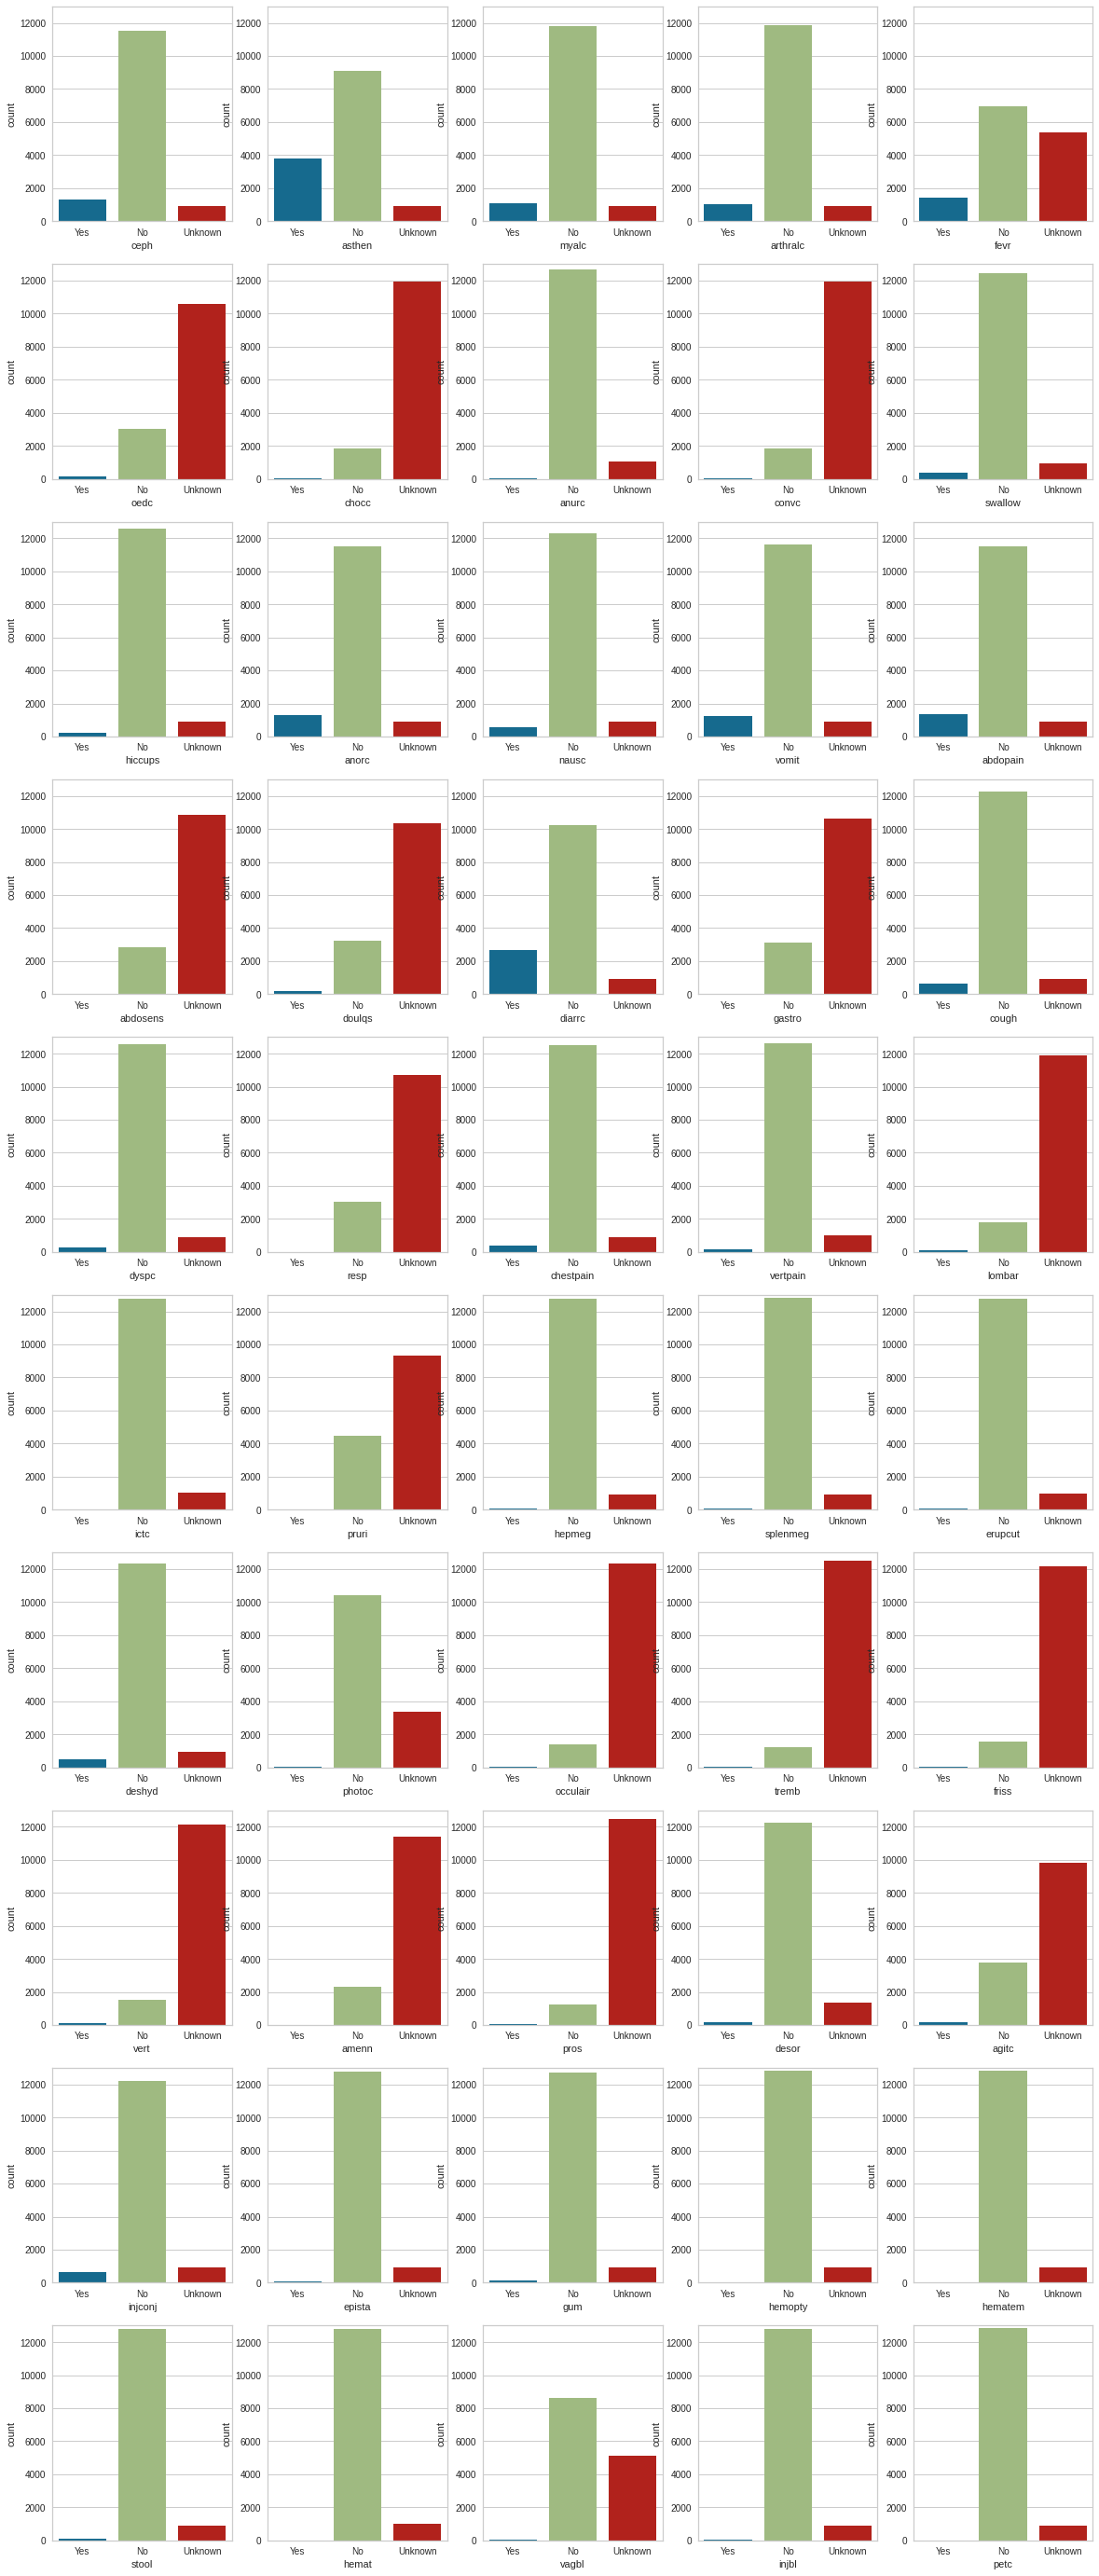

In [15]:
fig, axes = plt.subplots(nrows = 10, ncols=5, figsize=(20,50))
for ax, col in zip(axes.flatten(), df_symp.columns):
    sns.countplot(df_symp[col], ax = ax, order = ['Yes', 'No', 'Unknown'])
    #plt.title('Distribution of the symptom {}'.format(col))
    ax.set_ylim(0, 13000)

In [16]:
yes_series = df_symp.applymap(lambda x : 1 if x== 'Yes' else 0 ).apply(lambda x :sum(x))
no_series = df_symp.applymap(lambda x : 1 if x== 'No' else 0 ).apply(lambda x :sum(x))
unknown_series = df_symp.applymap(lambda x : 1 if x== 'Unknown' else 0 ).apply(lambda x :sum(x))

In [17]:
count_symptoms = pd.concat([yes_series, no_series, unknown_series], axis=1)
count_symptoms.columns = ['Yes', 'No', 'Unknown']
total_observations = 13598
count_symptoms / total_observations

,Yes,No,Unknown
ceph,0.096338,0.849095,0.066922
asthen,0.276879,0.668848,0.066627
myalc,0.078909,0.866451,0.066995
arthralc,0.074937,0.870349,0.067069
fevr,0.104280,0.513090,0.394985
oedc,0.011031,0.223856,0.777467
chocc,0.002647,0.133034,0.876673
anurc,0.003456,0.933740,0.075158
convc,0.000882,0.134505,0.876967
swallow,0.028754,0.916605,0.066995


In [18]:
df_clinic['msfid'].value_counts().head()

G313     77
G2472    72
U4       69
G2477    63
G412     58
Name: msfid, dtype: int64

In [19]:
# People might have gone mutliple times at the clinic, how often do they come with these symptoms
df_yes_symp = df_symp.applymap(lambda x : 1 if x== 'Yes' else 0 )
df_yes_symp['msfid'] = df_clinic['msfid']
df_yes_symp.head()

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,epista,gum,hemopty,hematem,stool,hemat,vagbl,injbl,petc,msfid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,G100


In [20]:
# Number of times a patient was tested positive:sum

In [21]:
df_yes_symp_patient = df_yes_symp.groupby('msfid').sum()
df_yes_symp_patient.head()

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,injconj,epista,gum,hemopty,hematem,stool,hemat,vagbl,injbl,petc
msfid,,,,,,,,,,,,,,,,,,,,,
G100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G1000,0,2,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
G1001,1,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G1002,2,5,0,0,5,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
G1004,0,2,1,0,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
# Simple yes or no dataframe. Does not take into account the time 

In [23]:
df_presence_symp_patient = df_yes_symp_patient.applymap(lambda x: 1 if x>= 1 else 0 )
df_presence_symp_patient.head()

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,injconj,epista,gum,hemopty,hematem,stool,hemat,vagbl,injbl,petc
msfid,,,,,,,,,,,,,,,,,,,,,
G100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G1000,0,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
G1001,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G1002,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
G1004,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
df_symp['msfid'] = df_clinic['msfid']

In [25]:
df_symp.columns

Index(['ceph', 'asthen', 'myalc', 'arthralc', 'fevr', 'oedc', 'chocc', 'anurc',
       'convc', 'swallow', 'hiccups', 'anorc', 'nausc', 'vomit', 'abdopain',
       'abdosens', 'doulqs', 'diarrc', 'gastro', 'cough', 'dyspc', 'resp',
       'chestpain', 'vertpain', 'lombar', 'ictc', 'pruri', 'hepmeg',
       'splenmeg', 'erupcut', 'deshyd', 'photoc', 'occulair', 'tremb', 'friss',
       'vert', 'amenn', 'pros', 'desor', 'agitc', 'injconj', 'epista', 'gum',
       'hemopty', 'hematem', 'stool', 'hemat', 'vagbl', 'injbl', 'petc',
       'msfid'],
      dtype='object')

# Model on Linelist, prediction of ebola, yes or no 


In [26]:
symptoms_pred = ['symfev', 'symn', 'symv', 'symvom', 'symdiar', 'symfat',
       'symanor', 'symdouab', 'symdouth', 'symdoumu', 'symdouar',
       'symceph', 'symtoux', 'symresp', 'symaval', 'symmalg', 'symict',
       'symconj', 'symercut', 'symhoq', 'symorb', 'symcoma', 'symconf',
       'symasth', 'symhemor', 'hemgen', 'heminj', 'hemnez', 'hemsel',
       'hemvoms', 'hemvomn', 'hemtou', 'hemvag', 'hempet', 'hemuri',
       'hemaut', 'contsusp', 'funvis', 'hospvis', 'anicon', 'anitiq','epistat']

In [27]:
df_symp_pred = df_linelist[symptoms_pred]
df_sex = df_linelist['sex']
df_sex = df_sex.astype('str')
df_symp_pred = df_symp_pred.astype('str')

In [28]:
dict_symp_answer = {'Non' : 'No', 'Oui' : 'Yes', 'Non rempli' : 'Unknown', 
                    'Pas applicable (non inclus dans fiche)' : 'Unknown', 
                    'Unknown' : '-1', 'Nan' : '-1', 'nan' : '-1', '7' : '-1',
                    'na': '-1', '.': '-1', 
                    '8': '-1', '9': '-1', '1':'1', '0':'0', '2':'-1', '3':'-1'}


df_symp_pred = df_symp_pred.applymap(lambda x : dict_symp_answer[x])


In [29]:
# 1 for women, 2 for men
dict_sex = {'1': '1', '2':'0', '9': '-1'}
df_sex = df_sex.apply(lambda x : dict_sex[x])

In [30]:
df_ml_pred = pd.concat([df_sex, df_symp_pred], axis = 1, join = 'outer')
df_ml_pred.head()

,sex,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,symdouth,...,hemvag,hempet,hemuri,hemaut,contsusp,funvis,hospvis,anicon,anitiq,epistat
0,0,1,-1,-1,1,0,-1,-1,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,1,-1,-1,1,1,-1,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2,1,1,-1,-1,0,0,-1,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,1,1,-1,-1,0,1,-1,1,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,0,1,-1,-1,0,1,-1,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


# For Clinical

In [31]:
# Removed rows with dots (not many) as can't be replaced by yes no

df_clinic = df_clinic[df_clinic['pouls'] != '.']
df_clinic = df_clinic[df_clinic['bp'] != '.']
df_clinic = df_clinic[df_clinic['rrate'] != '.']

In [32]:
df_clinic['pouls'] = df_clinic['pouls'].astype('int')
df_clinic['bp'] = df_clinic['bp'].astype('int')
df_clinic['rrate'] = df_clinic['rrate'].astype('int')


In [33]:
# Adding the lan
df_lab_results = df_clinic[['fevtemp', 'pouls', 'bp', 'rrate', 'msfid']] 

df_lab_results = df_lab_results.groupby(by = 'msfid').mean()

In [34]:
df_lab_yes_symp = df_yes_symp_patient.merge(df_lab_results, on = 'msfid', how = 'inner')

In [35]:
df_lab_yes_symp.head()

,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,swallow,...,hematem,stool,hemat,vagbl,injbl,petc,fevtemp,pouls,bp,rrate
msfid,,,,,,,,,,,,,,,,,,,,,
G100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,53.460000,999.0,999.0,999.0
G1000,0,2,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,78.966667,999.0,999.0,999.0
G1001,1,1,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,86.520000,999.0,999.0,999.0
G1002,2,5,0,0,5,0,0,2,0,0,...,0,0,0,0,0,0,80.167347,999.0,999.0,999.0
G1004,0,2,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,38.166667,999.0,686.0,999.0


In [36]:
# Ebola patients

print(df_linelist['epistat'].value_counts().head())
print(df_linelist['age'].value_counts().head())

# 
df_linelist['sex'].value_counts().head()

1    1372
0     978
2     135
3      13
9       2
Name: epistat, dtype: int64
30.0    150
25.0    119
35.0    118
40.0    115
60.0     93
Name: age, dtype: int64


1    1303
2    1125
9      72
Name: sex, dtype: int64

In [37]:
df_status = df_linelist[['epistat','age', 'sex','msfid']]

df_status.head()

,epistat,age,sex,msfid
0,2,60.0,2,G1
1,1,35.0,2,G10
2,1,40.0,1,G100
3,1,40.0,1,G1000
4,1,8.0,2,G1001


In [38]:
df_ml_sum_symp = df_lab_yes_symp.merge(df_status, how = 'inner', on = 'msfid')

df_ml_sum_symp.head()

,msfid,ceph,asthen,myalc,arthralc,fevr,oedc,chocc,anurc,convc,...,vagbl,injbl,petc,fevtemp,pouls,bp,rrate,epistat,age,sex
0,G100,0,0,0,0,0,0,0,0,0,...,0,0,0,53.460000,999.0,999.0,999.0,1,40.0,1
1,G1000,0,2,1,1,0,0,0,1,0,...,0,0,0,78.966667,999.0,999.0,999.0,1,40.0,1
2,G1001,1,1,2,0,1,0,0,0,0,...,0,0,0,86.520000,999.0,999.0,999.0,1,8.0,2
3,G1002,2,5,0,0,5,0,0,2,0,...,0,0,0,80.167347,999.0,999.0,999.0,1,12.0,2
4,G1004,0,2,1,0,3,0,0,0,0,...,0,0,0,38.166667,999.0,686.0,999.0,1,4.0,1


In [39]:
# Number of patients that enlisted 
len(df_linelist)

2500

### Date of admission at Macenta

In [40]:

df_linelist['datmac'].value_counts(dropna = False).head()

01/01/1900    1734
10/17/2014      26
10/31/2014      23
11/05/2014      19
09/11/2014      19
Name: datmac, dtype: int64

*Missing date of admission for 1734 patients out of 2500*

In [41]:
# Let's replace the wrong date to Not a time value

df_linelist.loc[df_linelist['datmac'] == '01/01/1900', 'datmac'] = pd.NaT
df_linelist['datmac'] = pd.to_datetime(df_linelist['datmac'])
df_linelist['datmac_day'] = df_linelist['datmac'].dt.to_period('D')
df_linelist['datmac_dayofyear'] = df_linelist['datmac_day'].dt.dayofyear
df_linelist['datmac_month'] = df_linelist['datmac'].dt.to_period('M')

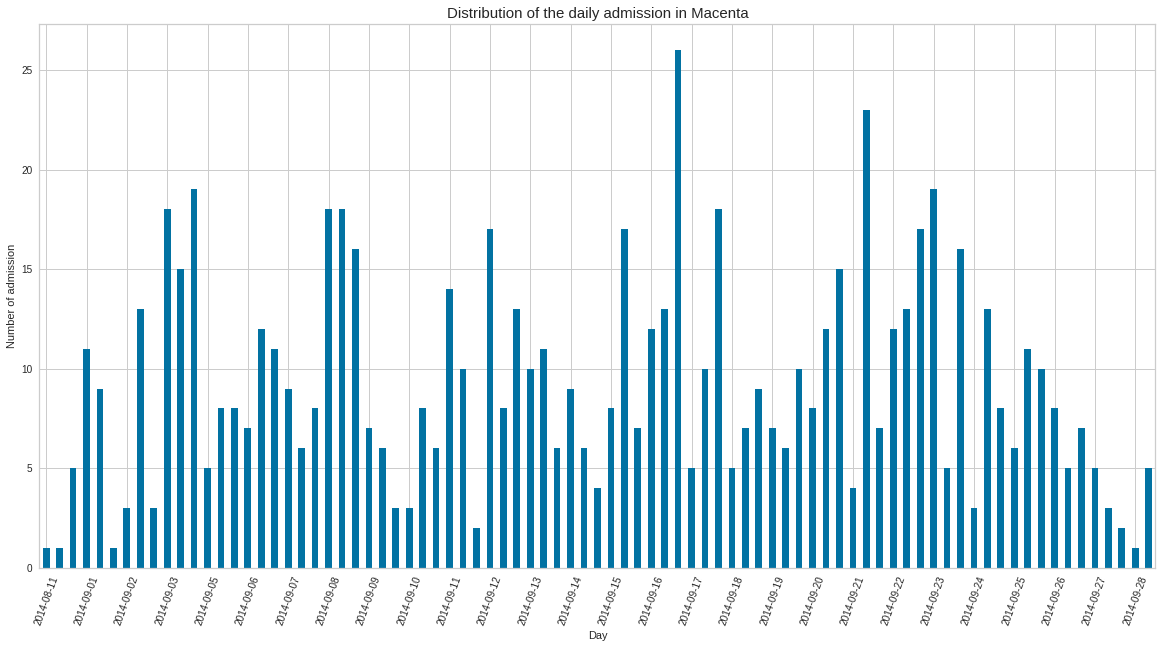

In [42]:
fig, ax = plt.subplots(figsize=(20,10))

df_linelist['datmac_day'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the daily admission in Macenta",size=15)
ax.set_xlabel('Day')
ax.set_ylabel('Number of admission')
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.xticks(rotation=70)
plt.show()

### Admitted to Guéckédou

In [43]:
# Transit
df_linelist['admis'].value_counts(dropna= False)

Oui    1635
Non     865
Name: admis, dtype: int64

### Date d'admission to Guéckédou

In [44]:
df_linelist['datgck'].value_counts(dropna= False).head()

01/01/1900    869
11/09/2014     26
09/01/2014     25
10/08/2014     25
8/18/2014      23
Name: datgck, dtype: int64

In [45]:
# Same procedure as before, we replace the unknown admission dates by NaT
df_linelist.loc[df_linelist['datgck'] == '01/01/1900', 'datgck'] = pd.NaT

df_linelist['datgck'] = pd.to_datetime(df_linelist['datgck'])
df_linelist['datgck_day'] = df_linelist['datgck'].dt.to_period('D')
df_linelist['datgck_dayofyear'] = df_linelist['datgck_day'].dt.dayofyear
df_linelist['datgck_month'] = df_linelist['datgck'].dt.to_period('M')

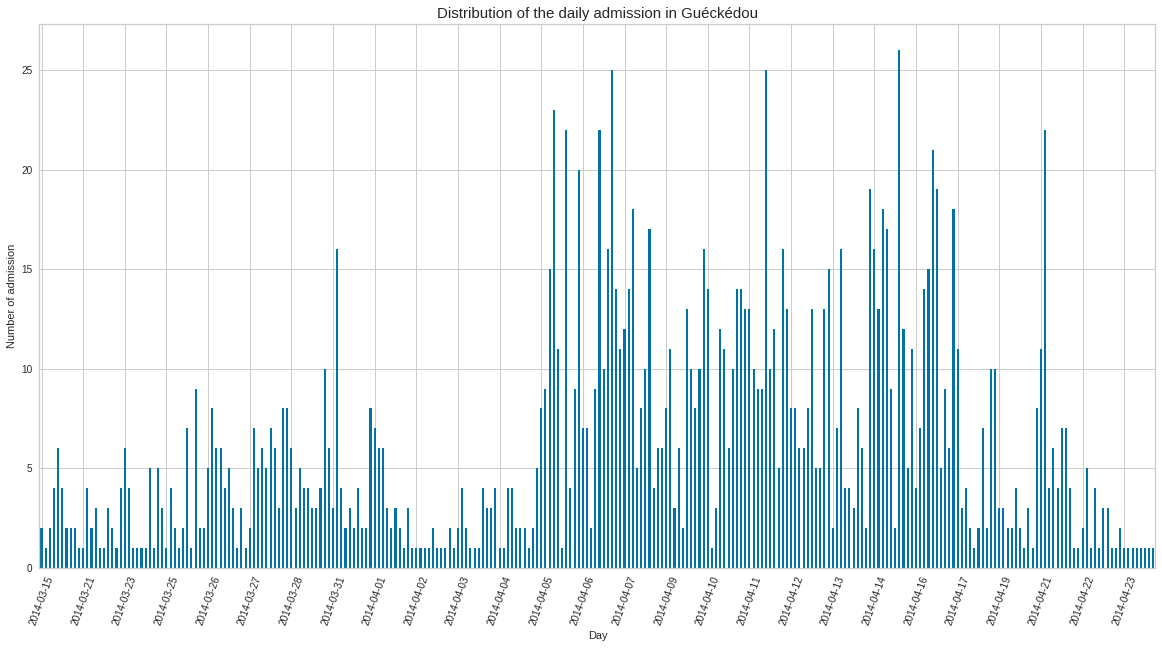

In [46]:
fig, ax = plt.subplots(figsize=(20,10))

df_linelist['datgck_day'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the daily admission in Guéckédou",size=15)
ax.set_xlabel('Day')
ax.set_ylabel('Number of admission')
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.xticks(rotation=70)
plt.show()

##### The patients contain two admission dates, Guéckédou and Macenta 

The following questions arise
- Can the same patient be admitted to both hospitals ? 
- Which hospital transfers to who 


In [47]:
# Patients with records missing for both dates 

print(sum(df_linelist['datgck'].isna() & df_linelist['datmac'].isna()), "Patients with records missing for both dates")

490 Patients with records missing for both dates


In [48]:
# Patients with both records
sum(~df_linelist['datgck'].isna() & ~df_linelist['datmac'].isna())

387

For these patients, let us see at which center they were admitted first 

In [49]:
df_both_present_admin_date = df_linelist.loc[~df_linelist['datgck'].isna() & ~df_linelist['datmac'].isna()]
sum(df_both_present_admin_date['datgck'] >= df_both_present_admin_date['datmac'])

# The date of admission is higer at Guéckédou than at Macenta for all patients that are recorded in both clinics

387

In [50]:
# Patients admitted at Macenta only 
print(sum(df_linelist['datgck'].isna() & ~df_linelist['datmac'].isna()), "Patients only admitted at Macenta")

379 Patients only admitted at Macenta


In [51]:
# Patients admitted at Macenta only 
print(sum(df_linelist['datmac'].isna() & ~df_linelist['datgck'].isna()), "Patients only admitted at Guéckédou")

1244 Patients only admitted at Guéckédou


## Age of patients 

In [52]:
df_linelist['age'].value_counts(dropna = False).head()

30.0    150
25.0    119
35.0    118
40.0    115
60.0     93
Name: age, dtype: int64

In [53]:
print("We have ",df_linelist['age'].value_counts()[999.0], " unknown ages")

We have  70  unknown ages


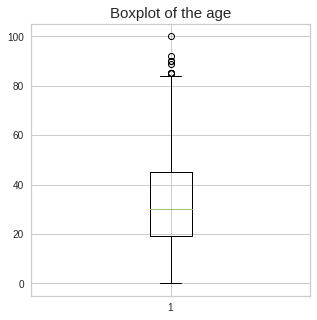

In [54]:
df_linelist['age'].replace(999.0, np.nan,inplace = True)
fig, ax = plt.subplots(figsize=(5,5))

ax.set_title("Boxplot of the age",size=15)
plt.boxplot(df_linelist.loc[~df_linelist['age'].isna(),'age'])
plt.show()

## Sex

In [55]:
df_linelist['sex'].value_counts(dropna = False)

1    1303
2    1125
9      72
Name: sex, dtype: int64

*We have 72 patients with unspecified sex*

Using the provided dictionary for this study, we apply it to the sex column

In [56]:
dict_sex = {1.0 : 'F', 2.0 : 'M', 9.0 : 'U'}
df_linelist['sex'] = df_linelist['sex'].apply(lambda x: dict_sex[x])

## Residence // Location 

#### Prefecture

In [57]:
dict_pref = {1 : 'Beyla', 4 : 'Conakry', 6 : 'Dabola', 8 : 'Dinguiraye', 10 : 'Faranah', 11 : 'Forécariah', \
             14 : 'Guéckédou', 15 : 'Kankan', 16 : 'Kérouane', 18 : 'Kissidougou', 21 : 'Kouroussa', \
             24 : 'Lola', 25 : 'Macenta', 29 : 'Nzérékoré', 31 : 'Siguiri', 34 : 'Yomou', 77 : 'Other', \
                99 : 'Unknown', 35 : 'LIBERIA', 36 : 'SIERRA LEONE', 'Unknown' : 'Unknown'}

df_linelist['respref'] = df_linelist['respref'].apply(lambda x: dict_pref[x])

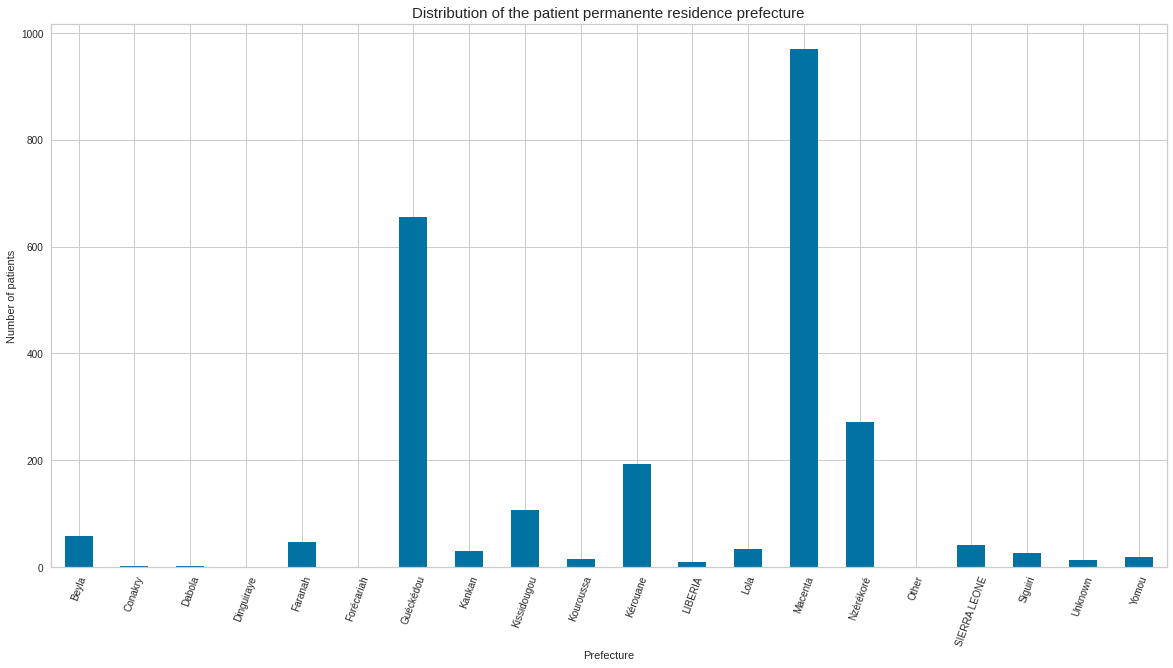

In [58]:
fig, ax = plt.subplots(figsize=(20,10))

df_linelist['respref'].value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the patient permanente residence prefecture",size=15)
ax.set_xlabel('Prefecture')
ax.set_ylabel('Number of patients')
plt.xticks(rotation=70)
plt.show()

### Country

In [59]:
df_linelist['rescount'].value_counts(dropna = False)

1    2436
3      41
9      14
2       9
Name: rescount, dtype: int64

In [60]:
dict_rescount = {1 : 'Guinea', 2 : 'Liberia', 3 : 'Sierra Leone', 9 : 'Unknown'}

df_linelist['rescount'] = df_linelist['rescount'].apply(lambda x: dict_rescount[x])

## Date of death 

In [61]:
df_linelist['admddt'].value_counts(dropna = False).head()

.             2028
1/1/1800       421
01/01/1900      43
9/22/2014        2
9/18/2014        1
Name: admddt, dtype: int64

In [62]:
#We replace the wrong date to Not a time value
df_linelist['admddt'].replace('.', pd.NaT, inplace = True)
df_linelist.loc[df_linelist['admddt'] == '01/01/1900', 'admddt'] = pd.NaT
df_linelist.loc[df_linelist['admddt'] == '1/1/1800', 'admddt'] = pd.NaT

In [63]:
df_linelist['admddt'].value_counts(dropna = False).head()

NaN           2492
9/22/2014        2
9/18/2014        1
10/05/2014       1
10/01/2014       1
Name: admddt, dtype: int64

### Job

In [64]:
df_linelist['joblist'].value_counts().head()

.                     1502
Ménagère               428
Planteur/elevateur     189
Autre                  121
Enfant                  56
Name: joblist, dtype: int64

In [65]:
df_linelist['joblist'].replace('.', 'Unknown', inplace = True)
df_linelist['joblist'].replace('Pas rempli', 'Unknown', inplace = True)
df_linelist['joblist'].value_counts().head()

Unknown               1538
Ménagère               428
Planteur/elevateur     189
Autre                  121
Enfant                  56
Name: joblist, dtype: int64

In [66]:
# Other jobs, many missing values
df_linelist['jobothr'].value_counts().head()

.              2046
NSP             228
NR               85
CULTIVATEUR      20
ELEVE            13
Name: jobothr, dtype: int64

In [67]:
df_linelist['job'].value_counts().head()

Non rempli     980
Ménagère       252
Cultivateur    238
Menagere       193
Menagère       119
Name: job, dtype: int64

In [68]:
# Workers in the health care sytem 
df_linelist['psantp'].value_counts().head()

.             2029
Non Rempli     401
NSP             55
ATS              6
Infermiere       4
Name: psantp, dtype: int64

## Place of sickness 

In [69]:

df_linelist['malpref'].replace('.', 99, inplace = True)

df_linelist['malpref'].value_counts().head()

99    1337
25     498
29     165
16     134
18     100
Name: malpref, dtype: int64

In [70]:
(df_linelist['malpref']== '25').sum()

498

In [71]:
df_linelist['malpref'] =df_linelist['malpref'].astype('int')
df_linelist['malpref'] = df_linelist['malpref'].apply(lambda x: dict_pref[x])
df_linelist['malpref'].value_counts(dropna = False).head()

Unknown        1339
Macenta         498
Nzérékoré       165
Kérouane        134
Kissidougou     100
Name: malpref, dtype: int64

In [72]:
# Place of sickness sous- prefecture
df_linelist['malsous'].value_counts().head()

Non specifié         1531
Banankoro              92
Fermessadou-Pombo      78
Fassankoni             70
Nzérékoré-Centre       64
Name: malsous, dtype: int64

In [73]:
# Place of sickness village
df_linelist['malquart'].value_counts().head()

Non rempli    1375
Banankoro       72
Wondero         50
Dandano         33
Bofossou        31
Name: malquart, dtype: int64

### Pregnancy

In [74]:
df_linelist['grossess'].value_counts(dropna = False)
df_linelist['grossess'].replace('.', '9', inplace = True )

In [75]:
df_linelist['grossess'].fillna('Unknown', inplace = True)

dict_rescount = { '1': 'Yes', '7' : 'Not applicable', '9' : 'Unknown', 'Unknown' : 'Unknown'}

df_linelist['grossess'] = df_linelist['grossess'].apply(lambda x: dict_rescount[x])

In [76]:
df_linelist['grossess'].value_counts().head()

Unknown           1297
Not applicable    1200
Yes                  3
Name: grossess, dtype: int64

### Start of the symptoms

In [77]:
df_linelist['datsym'].value_counts(dropna = False).head()

01/01/1900    68
11/02/2014    43
10/01/2014    32
09/01/2014    30
10/10/2014    27
Name: datsym, dtype: int64

In [78]:
#We replace the wrong date to Not a Time value (NaT)

In [79]:
df_linelist.loc[df_linelist['datsym'] == '01/01/1900', 'datsym'] = pd.NaT
df_linelist.loc[df_linelist['datsym'] == '.', 'datsym'] = pd.NaT

In [80]:


df_linelist['datsym'] = pd.to_datetime(df_linelist['datsym'])
df_linelist['datsym'].value_counts(dropna = False)

NaT           69
2014-11-02    43
2014-10-01    32
2014-09-01    30
2014-10-10    27
              ..
2014-02-25     1
2014-07-16     1
2014-05-04     1
2014-07-22     1
2014-02-22     1
Name: datsym, Length: 325, dtype: int64

### Referral time

The referral time corresponds to the nummber of day elapsed between the start of the symptoms and the patients first admission. It is hard to exactly pin-point when sysmptoms start as this is a subjective measure given by the patients. 

We compute the referral time, that is the number of days between the start of the symptoms and their first admission. If the start of the symptoms date or the admission date is not present we can't conclude anything. We have also two dates of admission in 2 different centers Macenta and Guéckédou, sometimes it's only one of the two or the patient is first admittend in Macenta and then trasnferred to Guéckédou.

In [81]:
def compute_referral_time(row):       
    if(row.datmac != pd.NaT and row.datsym != pd.NaT):
        return  row.datmac - row.datsym 
    elif(row.datgck != pd.NaT and row.datsym != pd.NaT):
        return  row.datgck - row.datsym
    else:
        return pd.NaT

df_linelist['referral_time'] = df_linelist.apply(compute_referral_time, axis = 1)
df_linelist['referral_time'].value_counts(dropna = False).head()

NaT       1740
2 days     131
3 days     113
4 days     108
7 days      84
Name: referral_time, dtype: int64

We have some negative values, meaning that the patients arrive at the center before their symptoms start. We consider them as outliers and remove them. 

In [82]:
df_linelist.loc[df_linelist['referral_time'] < np.timedelta64(0, 'D'), ['datmac','datgck', 'datsym']]

,datmac,datgck,datsym
652,2014-10-29,NaT,2014-10-30
1323,2014-09-23,NaT,2014-10-23
1398,2014-09-11,NaT,2014-09-29


In [83]:
# Remove the outliers (patients)
df_linelist.drop(index=[652, 1323, 1398], inplace = True)


In [84]:
df_linelist['referral_time'] / np.timedelta64(1, 'D')

0       NaN
1       NaN
2       NaN
3       3.0
4       3.0
       ... 
2495    NaN
2496    NaN
2497    NaN
2498    NaN
2499    0.0
Name: referral_time, Length: 2497, dtype: float64

In [85]:
df_linelist['referral_time_int'] = df_linelist['referral_time'] / np.timedelta64(1, 'D')
df_linelist['referral_time_int'].fillna(-1, inplace = True)
df_linelist['referral_time_int'].head()

0   -1.0
1   -1.0
2   -1.0
3    3.0
4    3.0
Name: referral_time_int, dtype: float64

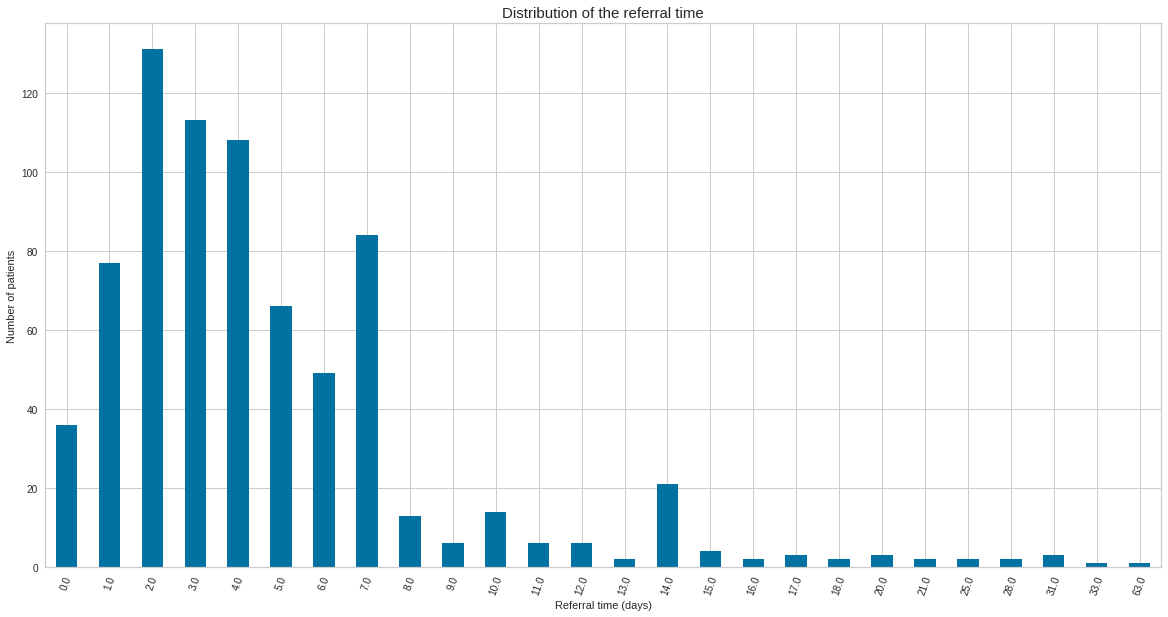

In [86]:
fig, ax = plt.subplots(figsize=(20,10))

df_linelist['referral_time'].dt.days.value_counts().sort_index().plot(kind ="bar")

ax.set_title("Distribution of the referral time",size=15)
ax.set_xlabel('Referral time (days)')
ax.set_ylabel('Number of patients')
plt.xticks(rotation=70)
plt.show()

### Symptoms

In [87]:
df_linelist['symfev'].value_counts().head()

1    1303
9     616
0     577
8       1
Name: symfev, dtype: int64

In [88]:
dict_name_col = {'symfev': 'Fievre', 'symtemp': 'Temperature', 'symn': 'Nausees', \
                 'symv': 'Vomissement', 'symvom': 'Nausees-Vomissement', \
                 'symdiar': 'Diarrhée', 'symfat': 'Fatigue', 'symanor': 'Anorexie', \
                 'symdouab': 'Douleur abdominale', 'symdouth': 'Douleurs thoraciques', \
                 'symdoumu': 'Douleurs musculaires Myalgie (body pain)', 'symdouar': 'Douleur articul? Athralgie (joint pain)',\
                 'symceph': 'Cephalée', 'symtoux': 'Toux', 'symresp': 'Difficultés respirer', 'symaval': 'Difficultés avaler',\
                 'symmalg': 'Mal à la gorge', 'symict': 'Ictère (jaune conjuctives/gencives/peau)',\
                 'symconj': 'Conjonctivite (oeil rouge)', 'symercut': 'Eruptions cutanées', 'symhoq': 'Hoquet',\
                 'symorb': 'Douleurs retro-orbirtaires/photophobia', 'symcoma': 'Coma/perte de conscience', \
                 'symconf': 'Confusion ou desorientation', 'symasth': 'Asthenie Physique', \
                 'symhemor': 'Saignement/Hemor ragie', 'hemgen': 'Saignements des gencives', \
                 'heminj': "Saignements de sites d'injection", 'hemnez': 'saignements du nez (epistaxis)',\
                 'hemsel': 'Selles rouge ou noires (melenas)', 'hemvoms': 'Vomissements sanglants (hematemeses)', \
                 'hemvomn': 'Vomissements noiratre (vomito negro)', 'hemtou': 'Toux sanglante (hemoptysie)', \
                 'hemvag': 'Saignements vaginaux', 'hempet': 'Hematomes/pétéchies/purpura', \
                 'hemuri': 'Sang dans les urine (hematurie)', 'hemaut': 'Autres sines hémorragiques', \
                 'authem': 'Si Oui, precisez autre hem', 'symaut': 'Autres symtomes', \
                 'autsym': 'Si Oui, precisez autre symtomes'}

In [90]:
symptoms_info = df_linelist.columns[25:61]



In [91]:
symptoms_info = df_linelist.columns[25:61]
#removing temperature
symptoms_info = symptoms_info.drop(['symtemp'])
symptoms_info_other = df_linelist.columns[61:65]
print(symptoms_info)
print(len(symptoms_info))
print(symptoms_info_other)

Index(['symfev', 'symn', 'symv', 'symvom', 'symdiar', 'symfat', 'symanor',
       'symdouab', 'symdouth', 'symdoumu', 'symdouar', 'symceph', 'symtoux',
       'symresp', 'symaval', 'symmalg', 'symict', 'symconj', 'symercut',
       'symhoq', 'symorb', 'symcoma', 'symconf', 'symasth', 'symhemor',
       'hemgen', 'heminj', 'hemnez', 'hemsel', 'hemvoms', 'hemvomn', 'hemtou',
       'hemvag', 'hempet', 'hemuri'],
      dtype='object')
35
Index(['hemaut', 'authem', 'symaut', 'autsym'], dtype='object')


In [92]:
df_linelist_symp = df_linelist[symptoms_info].copy()
df_linelist_symp.replace('.',9, inplace = True)
df_linelist_symp = df_linelist_symp.astype('int')
dict_symp_info = {0 : 'No', 1 : 'Yes', 7 : 'Unknown', 8 : 'Unknown', 9 : 'Unknown', 'Unknown' : 'Unknown', '.' : 'Unknown', '99.9' : 'Unknown'}

df_linelist_symp = df_linelist_symp.applymap(lambda x: dict_symp_info[x])
df_linelist_symp.head()

,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,symdouth,symdoumu,...,hemgen,heminj,hemnez,hemsel,hemvoms,hemvomn,hemtou,hemvag,hempet,hemuri
0,Yes,Unknown,Unknown,Yes,No,Unknown,Unknown,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Yes,Unknown,Unknown,Yes,Yes,Unknown,No,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,Yes,Unknown,Unknown,No,No,Unknown,No,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,Yes,Unknown,Unknown,No,Yes,Unknown,Yes,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,Yes,Unknown,Unknown,No,Yes,Unknown,No,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [93]:
#The patients where all th symptoms are 'Unknown'
df_info_symp_unknown = df_linelist_symp.eq('Unknown', axis=0).all(1)
sum(df_info_symp_unknown)

609

*We have 609 patients with only unknowns, we thus remove them*


In [94]:
df_linelist_symp = df_linelist_symp[~df_info_symp_unknown]
df_linelist_symp.head()

,symfev,symn,symv,symvom,symdiar,symfat,symanor,symdouab,symdouth,symdoumu,...,hemgen,heminj,hemnez,hemsel,hemvoms,hemvomn,hemtou,hemvag,hempet,hemuri
0,Yes,Unknown,Unknown,Yes,No,Unknown,Unknown,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,Yes,Unknown,Unknown,Yes,Yes,Unknown,No,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
2,Yes,Unknown,Unknown,No,No,Unknown,No,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,Yes,Unknown,Unknown,No,Yes,Unknown,Yes,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
4,Yes,Unknown,Unknown,No,Yes,Unknown,No,No,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


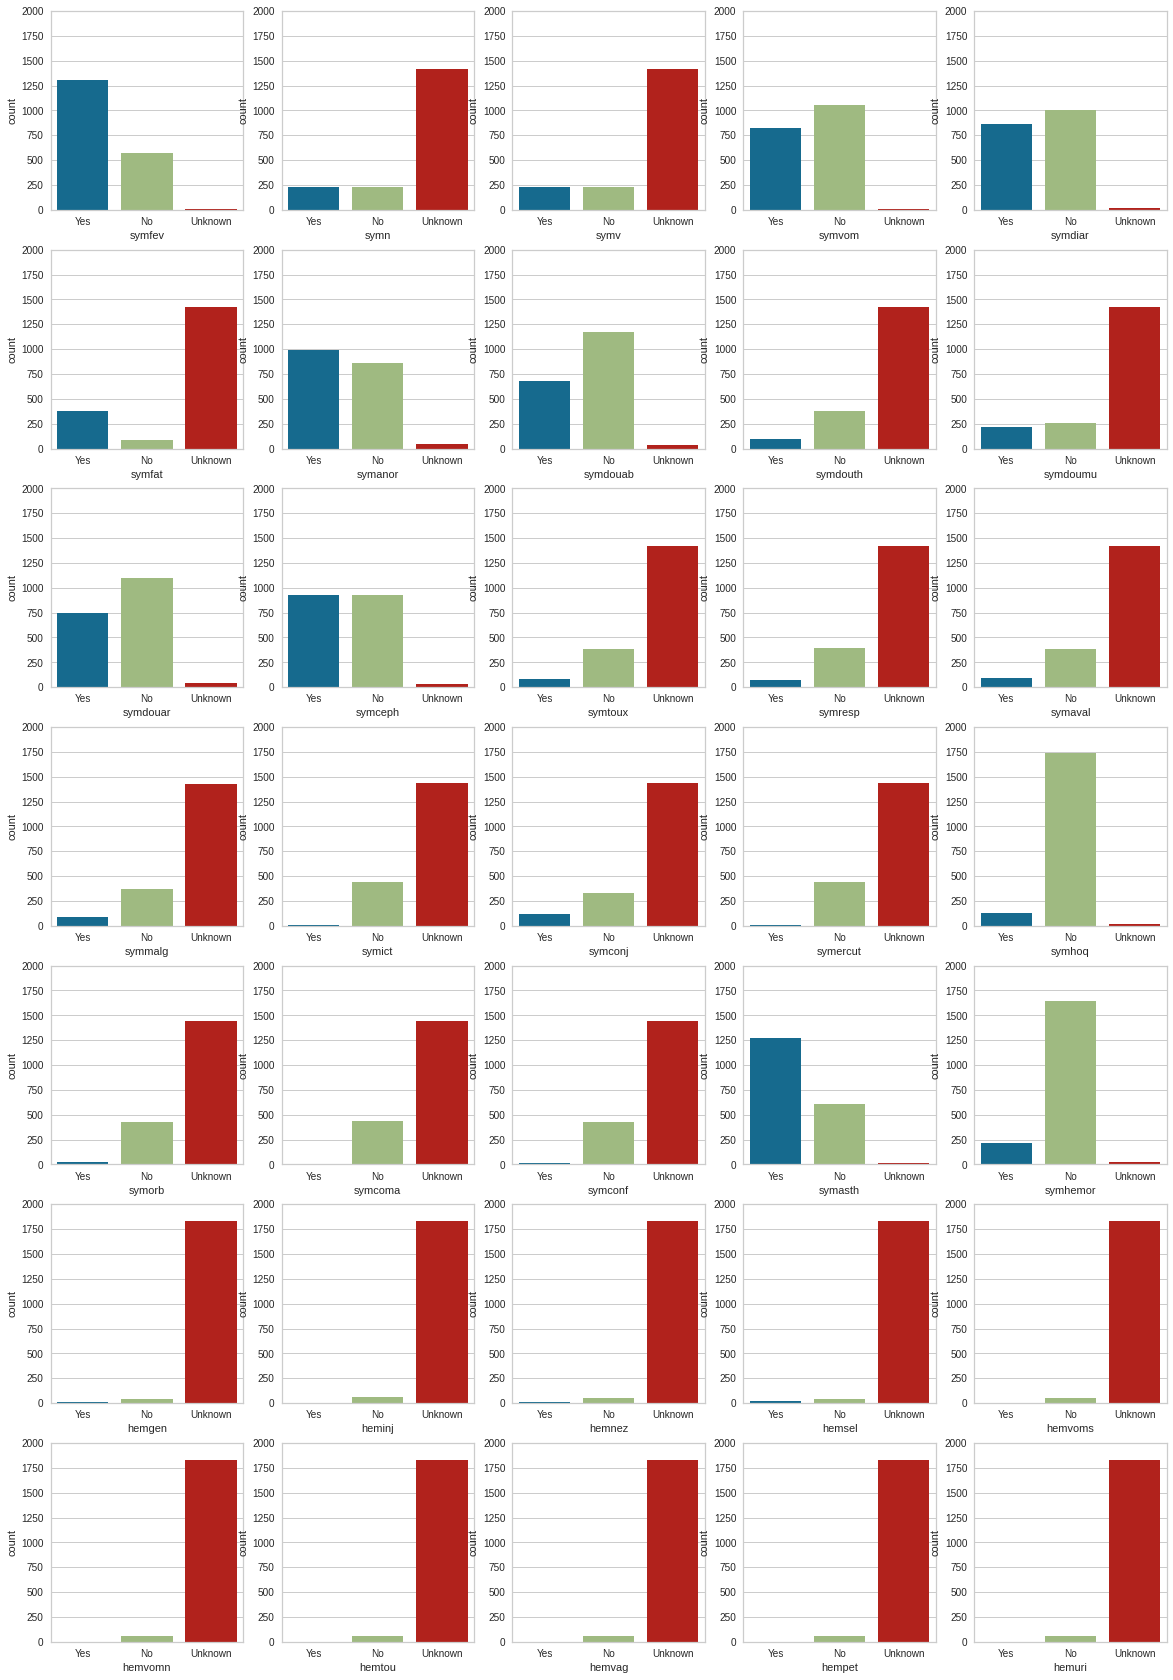

In [95]:
fig, axes = plt.subplots(nrows = 7, ncols=5, figsize=(20,30))
for ax, col in zip(axes.flatten(), df_linelist_symp.columns):
    sns.countplot(df_linelist_symp[col], ax = ax, order = ['Yes', 'No', 'Unknown'])
    #plt.title('Distribution of the symptom {}'.format(col))
    ax.set_ylim(0, 2000)

*From the graph above, we see that some symptoms hold a great number of unkowns (specifically those starting with "hem" for hemma (meaning blood))*
For example the feature "hemvomn" is "vomn" a.k.a vommit but with blood. These will be highly correlated 


#### Let us separate the symptoms into different series depending on the are yes, no or unknown 

In [96]:
#

yes_info_series = df_linelist_symp.applymap(lambda x : 1 if x== 'Yes' else 0 ).apply(lambda x :sum(x))
no_info_series = df_linelist_symp.applymap(lambda x : 1 if x== 'No' else 0 ).apply(lambda x :sum(x))
unknown_info_series = df_linelist_symp.applymap(lambda x : 1 if x== 'Unknown' else 0 ).apply(lambda x :sum(x))

In [97]:
count_info_symptoms = pd.concat([yes_info_series, no_info_series, unknown_info_series], axis=1)
count_info_symptoms.columns = ['Yes', 'No', 'Unknown']
total_observations = count_info_symptoms.apply(lambda x: sum(x), axis= 1)[0]
count_info_symptoms_temp = count_info_symptoms.copy()
count_info_symptoms.index = list(map(lambda x: dict_name_col[x], count_info_symptoms.index.values))
count_info_symptoms.sort_values(by= 'Unknown') / total_observations

,Yes,No,Unknown
Fievre,0.690148,0.305614,0.004237
Nausees-Vomissement,0.434322,0.558792,0.006886
Diarrhée,0.459216,0.532839,0.007945
Asthenie Physique,0.671610,0.319915,0.008475
Hoquet,0.067267,0.921081,0.011653
Saignement/Hemor ragie,0.115996,0.871822,0.012182
Cephalée,0.491525,0.489407,0.019068
Douleur abdominale,0.360169,0.620233,0.019597
Douleur articul? Athralgie (joint pain),0.397246,0.582627,0.020127
Anorexie,0.523835,0.454449,0.021716


___The table above is in French due to the dataframe, but we look at the percentage of samples with (yes, no or unknown) for the presented features ___

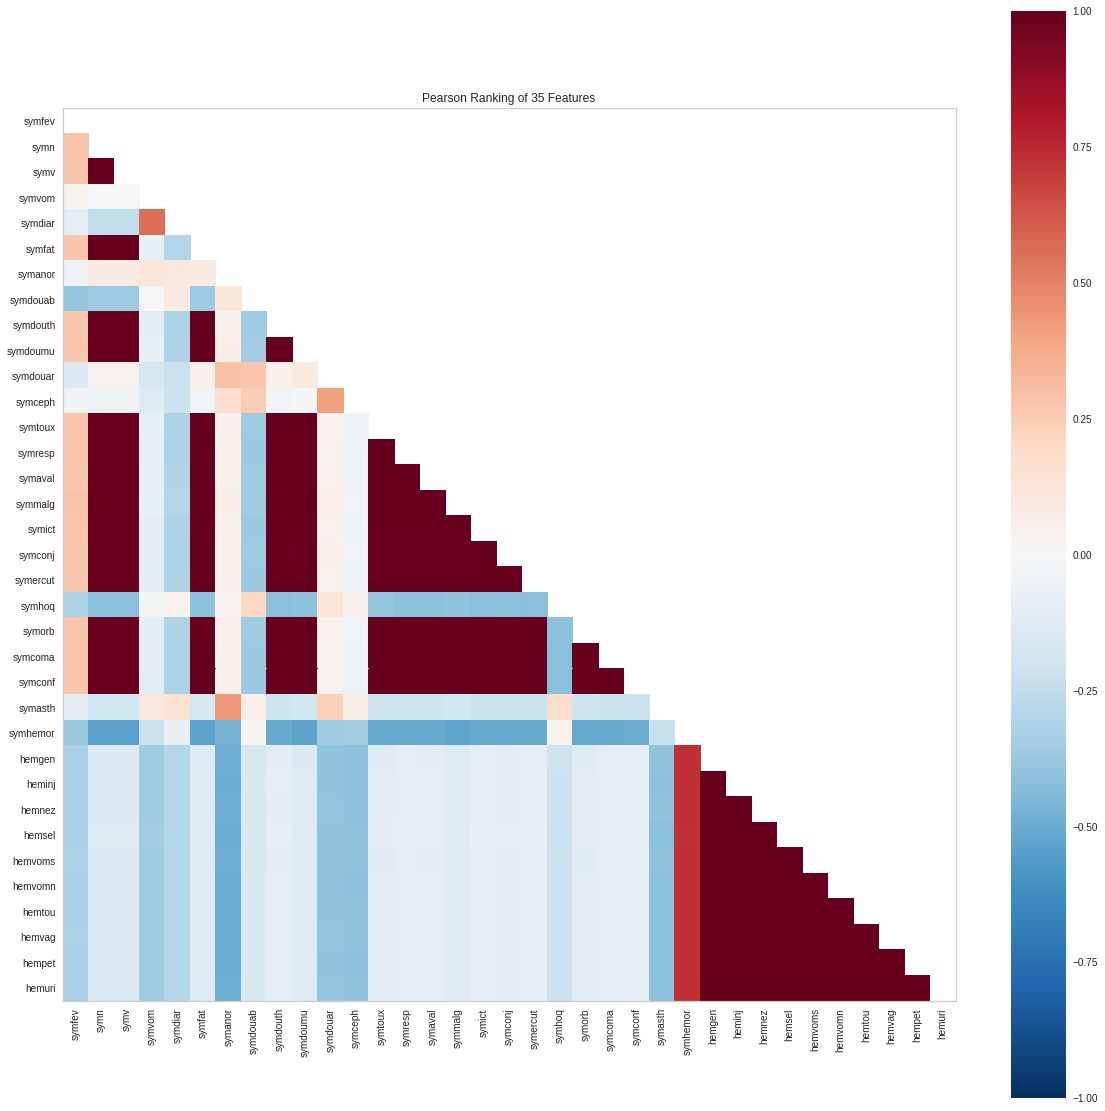

In [98]:
from yellowbrick.features import Rank2D

dict_symp = {'Unknown' : -1, 'No' : 0 , 'Yes' : 1}

fig, ax = plt.subplots(figsize=(20,20))
visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(df_linelist_symp.applymap(lambda x : dict_symp[x]).corr())
visualizer.show('corr_matrix')
plt.show()

In [99]:
df_nausee_vomissement = df_linelist_symp.groupby(by = ['symvom','symn','symv'])[['symv']].count()
df_nausee_vomissement.columns = ['count']
df_nausee_vomissement

count
symvom  symn    symv          
No      No      No         222
        Unknown Unknown    832
        Yes     Yes          1
Unknown No      No           3
        Unknown Unknown     10
Yes     No      No           5
                Yes          4
        Unknown Unknown    577
        Yes     No           5
                Yes        229

This table shows three symptoms (symvom ,symn ,symv ), and we conclude from it that symn and symv do not bring any interesting additional informations. They have many unknown features and they are similar to symvom when given values 


In [100]:
df_linelist_symp.drop(columns = ['symn','symv'], inplace = True)

### Symptoms groups

We distinguish 3 different groups of symptoms, the "first group" described below which contains almost almost all observations, the second group with 75 % missing values and a third one with over 96% missing values (these will be removed). 

We can see them in the correlation matrix (correspond to prefix - "hem")

In [101]:
symptoms_to_drop_group3 = ['hempet', 'hemgen', 'heminj', 'hemnez', 'hemsel', 'hemvoms', 'hemvomn', 'hemtou', 'hemvag', 'hemuri']
df_linelist_symp.drop(columns = symptoms_to_drop_group3, inplace = True)

In [102]:
symptoms_group1 = ['symfev', 'symvom', 'symdiar', 'symasth', 'symhoq', 'symhemor', 'symceph', 'symdouab', 'symdouar', 'symanor']
sum(df_linelist_symp[symptoms_group1].eq('Unknown').any(1))

69

By removing 69 patients, group 1 will be a complete set (no missing values within that dataframe)

- In this case, we will remove them, this is debatable decision and other possibilites would work

In [104]:
df_linelist_symp = df_linelist_symp[~df_linelist_symp[symptoms_group1].eq('Unknown').any(1)]
print("Data Frame with dropping the third group of symptoms and removing the 69 patients from the first group of patients \n \n")
df_linelist_symp.head()

Data Frame with dropping the third group of symptoms and removing the 69 patients from the first group of patients 
 



,symfev,symvom,symdiar,symfat,symanor,symdouab,symdouth,symdoumu,symdouar,symceph,...,symmalg,symict,symconj,symercut,symhoq,symorb,symcoma,symconf,symasth,symhemor
1,Yes,Yes,Yes,Unknown,No,No,Unknown,Unknown,No,No,...,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,Yes,Yes
2,Yes,No,No,Unknown,No,No,Unknown,Unknown,No,Yes,...,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,Yes,No
3,Yes,No,Yes,Unknown,Yes,No,Unknown,Unknown,Yes,No,...,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,No,No
4,Yes,No,Yes,Unknown,No,No,Unknown,Unknown,No,Yes,...,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,Yes,No
5,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,No,No,Yes,No,No,No,No,No,Yes,No


In [105]:
## Symptoms belonging to defined group 2

symptoms_group2 = ['symdoumu', 'symfat', 'symresp', 'symaval', 'symdouth', 'symtoux', 'symmalg', 'symercut', 'symconf', 'symcoma', 'symconj', 'symict', 'symorb']

print("{} patients have all features of group2 Unknown".format(sum(df_linelist_symp[symptoms_group2].eq('Unknown').all(1))))

print("{} patients have at least one feature of group2 Unknown".format(sum(df_linelist_symp[symptoms_group2].eq('Unknown').any(1))))

1364 patients have all features of group2 Unknown
1386 patients have at least one feature of group2 Unknown



Recap of what was done to the symptom data-frame:

- Split in three groups depending on the amount of unknown contained within the group

- Removing patients with unknows in the first group

- Deleted the third group with too many unknowns and that cause colinearity 

What's next:

- We note that 1364 have all features of group 2 unknwon (group 1 id filled)

- We cannot remove these patients as this will greatly decrease the informations we can collect from the first group of symptoms 

-  If we decide to go for the One hot encoding we will have the same columns of Unknown for all of those features. We decide therefore to group them all in one single Unknown feature with the value of 1 if at all one of the symptoms of group2 are Unknown. Remains 22 patients that have at least one value that isn't Unknown for those features.



In [107]:
patients_index_atleast_one_grp2 = ~df_linelist_symp[symptoms_group2].eq('Unknown').all(1) & df_linelist_symp[symptoms_group2].eq('Unknown').any(1)
df_linelist_symp.loc[patients_index_atleast_one_grp2,symptoms_group2].head()

,symdoumu,symfat,symresp,symaval,symdouth,symtoux,symmalg,symercut,symconf,symcoma,symconj,symict,symorb
523,No,Yes,No,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
524,Yes,No,No,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
564,No,Yes,No,No,No,Yes,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
593,Yes,Yes,No,No,No,No,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
655,No,No,No,No,No,Yes,No,No,Unknown,Unknown,No,No,Unknown


We decide to remove these 22 patients.

In [108]:
df_linelist_symp = df_linelist_symp[~patients_index_atleast_one_grp2]


In [109]:
df_linelist_symp.head()

,symfev,symvom,symdiar,symfat,symanor,symdouab,symdouth,symdoumu,symdouar,symceph,...,symmalg,symict,symconj,symercut,symhoq,symorb,symcoma,symconf,symasth,symhemor
1,Yes,Yes,Yes,Unknown,No,No,Unknown,Unknown,No,No,...,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,Yes,Yes
2,Yes,No,No,Unknown,No,No,Unknown,Unknown,No,Yes,...,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,Yes,No
3,Yes,No,Yes,Unknown,Yes,No,Unknown,Unknown,Yes,No,...,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,No,No
4,Yes,No,Yes,Unknown,No,No,Unknown,Unknown,No,Yes,...,Unknown,Unknown,Unknown,Unknown,No,Unknown,Unknown,Unknown,Yes,No
5,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,...,No,No,Yes,No,No,No,No,No,Yes,No


In [110]:
# Again, we will be interested in separating the groups, on how many yes, no and unknowns each symptoms has 

yes_linelist_series = df_linelist_symp.applymap(lambda x : 1 if x== 'Yes' else 0 ).apply(lambda x :sum(x))
no_linelist_series = df_linelist_symp.applymap(lambda x : 1 if x== 'No' else 0 ).apply(lambda x :sum(x))
unknown_linelist_series = df_linelist_symp.applymap(lambda x : 1 if x== 'Unknown' else 0 ).apply(lambda x :sum(x))

In [111]:
count_linelist_symptoms = pd.concat([yes_linelist_series, no_linelist_series, unknown_linelist_series], axis=1)
count_linelist_symptoms.columns = ['Yes', 'No', 'Unknown']
total_observations = count_linelist_symptoms.apply(lambda x: sum(x), axis= 1)[0]
count_linelist_symptoms_temp = count_linelist_symptoms.copy()
count_linelist_symptoms.index = list(map(lambda x: dict_name_col[x], count_linelist_symptoms.index.values))
count_linelist_symptoms.sort_values(by= 'Unknown') 

,Yes,No,Unknown
Fievre,1230,567,0
Hoquet,123,1674,0
Asthenie Physique,1203,594,0
Cephalée,896,901,0
Douleur articul? Athralgie (joint pain),730,1067,0
Saignement/Hemor ragie,210,1587,0
Anorexie,956,841,0
Diarrhée,820,977,0
Nausees-Vomissement,767,1030,0
Douleur abdominale,664,1133,0


__Unsuprinsgly many symptoms, group 1 has no missing values, but group 2 holds many__

In [112]:
df_linelist_symp_ml = df_linelist_symp.applymap(lambda x : 1 if x== 'Yes' else 0 )

# equals to 1 when all group2 features are Unknown
df_linelist_symp_ml['Unknown_grp2'] = df_linelist_symp[symptoms_group2].eq('Unknown').all(1).apply(lambda x: 1 if x else 0)
df_linelist_symp_ml.head()

,symfev,symvom,symdiar,symfat,symanor,symdouab,symdouth,symdoumu,symdouar,symceph,...,symict,symconj,symercut,symhoq,symorb,symcoma,symconf,symasth,symhemor,Unknown_grp2
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5,1,1,1,1,1,1,0,1,1,1,...,0,1,0,0,0,0,0,1,0,0


In [113]:
# We only keep the patients with at least an observed symptom
df_linelist = df_linelist.drop(columns = symptoms_info).join(df_linelist_symp_ml, how = 'inner')
df_linelist.head()

,msfid,mcid,datmac,transit,admis,gkdid,datgck,age,sex,respref,...,symict,symconj,symercut,symhoq,symorb,symcoma,symconf,symasth,symhemor,Unknown_grp2
1,G10,Absent,NaT,Non,Non,Absent,NaT,35.0,M,Guéckédou,...,0,0,0,0,0,0,0,1,1,1
2,G100,Absent,NaT,Non,Oui,GKD25,2014-04-11,40.0,F,Guéckédou,...,0,0,0,0,0,0,0,1,0,1
3,G1000,MC260,2014-09-17,Non,Oui,GKD775,NaT,40.0,F,Macenta,...,0,0,0,0,0,0,0,0,0,1
4,G1001,Absent,2014-09-17,Non,Oui,GKD776,2014-09-19,8.0,M,Macenta,...,0,0,0,0,0,0,0,1,0,1
5,G1002,255,2014-09-15,Non,Oui,GKD777,2014-09-19,12.0,M,Macenta,...,0,1,0,0,0,0,0,1,0,0


## Temperature 

In [115]:
df_linelist['symtemp'].value_counts().head()

.       1364
99.9     412
38         3
36.5       2
38.1       2
Name: symtemp, dtype: int64

The temperature is only known for 23 patients so it's not a useful feature.

In [116]:
df_linelist.drop(columns = 'symtemp', inplace= True)

In [117]:
# Other hemoragical signs 

df_linelist['hemaut'].value_counts().head()

.    1743
0      39
1      12
9       3
Name: hemaut, dtype: int64

In [118]:
df_linelist['authem'].value_counts().head()

.                          1763
NSP                          13
INJECTION CONJONCTIVALE       5
NR                            5
CONJONCTIVITE                 2
Name: authem, dtype: int64

In [119]:
df_linelist['symaut'].value_counts()

9    743
0    689
1    365
Name: symaut, dtype: int64

In [120]:
df_linelist['autsym'].value_counts().head()

.               1423
NSP              266
NR                45
VERTIGES           8
CONSTIPATION       4
Name: autsym, dtype: int64

### Is the patient currently hospitalized ? 

In [121]:
df_linelist['admisnow'].value_counts(dropna = False).head()

.    1365
1     290
0      77
9      65
Name: admisnow, dtype: int64

In [122]:
df_linelist['admisnow'].fillna('Unknown', inplace = True)

dict_admisnow = { '1': 'Yes', '0' : 'No', '9' : 'Unknown', 'Unknown' : 'Unknown', '.' : 'Unknown'}

df_linelist['admisnow'] = df_linelist['admisnow'].apply(lambda x: dict_admisnow[x])

In [123]:
df_linelist['admidat'].replace('.', pd.NaT,inplace = True)
df_linelist['admidat'] = pd.to_datetime(df_linelist['admidat'])
df_linelist['admidat_day'] = df_linelist['admidat'].dt.to_period('D')
df_linelist['admidat_month'] = df_linelist['admidat'].dt.to_period('M')

### In isolation 

In [124]:
df_linelist['admisol'].value_counts(dropna = False)

.    1400
1     245
9     124
8      16
0      12
Name: admisol, dtype: int64

In [125]:
df_linelist['admisol'].replace('.', 9,inplace = True)
df_linelist['admisol'] = df_linelist['admisol'].astype('int')
df_linelist['admisol'] = df_linelist['admisol'].apply(lambda x: dict_symp_info[x])
df_linelist['admisol'].value_counts(dropna = False)

Unknown    1540
Yes         245
No           12
Name: admisol, dtype: int64

If yes we have the start date of isolation.

In [126]:
df_linelist['isoldat'].value_counts(dropna = False).head()

.             1407
01/01/1900     124
1/1/1800        23
9/21/2014       14
10/31/2014      14
Name: isoldat, dtype: int64

In [127]:
# we proceed like previously
df_linelist['isoldat'].replace('.', pd.NaT,inplace = True)
df_linelist.loc[df_linelist['isoldat'] == '1/1/1800 ', 'isoldat'] = pd.NaT
df_linelist.loc[df_linelist['isoldat'] == '01/01/1900', 'isoldat'] = pd.NaT
df_linelist['isoldat'] = pd.to_datetime(df_linelist['isoldat'])
df_linelist['isoldat_day'] = df_linelist['isoldat'].dt.to_period('D')
df_linelist['isoldat_month'] = df_linelist['isoldat'].dt.to_period('M')

In [128]:
df_linelist['isoldat'].value_counts(dropna = False).head()

NaT           1531
1800-01-01      23
2014-09-21      14
2014-10-31      14
2014-12-18      10
Name: isoldat, dtype: int64

### Already hspoitalized somewhere else for this disease ?

In [129]:
df_linelist['memmal'].value_counts().head()

.    1374
0     252
9     125
1      43
7       2
Name: memmal, dtype: int64

In [130]:
df_linelist['memmal'].replace('.',9, inplace = True)

df_linelist['memmal'] = df_linelist['memmal'].astype('int')
df_linelist['memmal'] = df_linelist['memmal'].apply(lambda x: dict_symp_info[x])
df_linelist['memmal'].value_counts(dropna = False)

Unknown    1502
No          252
Yes          43
Name: memmal, dtype: int64

### Contact informations

Was in contact with a suspected case ? 

In [131]:
df_linelist['contlien1'].value_counts(dropna = False).head()

.              1364
Parent           82
Autre            75
Non-rempli       61
Frere/soeur      54
Name: contlien1, dtype: int64

In [132]:
dict_contact = {'.' : 'Unknown', 'Parent' : 'Parent', 'Autre' : 'Other', 'Non-rempli' : 'Unknown', \
                'Pas applicable' : 'Unknown', 'Frere/soeur' : 'Sibling', 'NSP' : 'Unknown', \
               'Parténaire' : 'Unknown', 'Enfant' : 'Kid', 'Tante/oncle' : 'Aunt and uncle'}

df_linelist['contlien1'] = df_linelist['contlien1'].apply(lambda x: dict_contact[x])

In [133]:
df_linelist['contlien1'].value_counts(dropna = False).head()

Unknown    1556
Parent       82
Other        75
Sibling      54
Kid          15
Name: contlien1, dtype: int64

In [134]:
df_linelist['contdat1'].value_counts(dropna = False).head()

.             1364
01/01/1900      96
1/1/1800        49
12/03/2014      18
9/30/2014       13
Name: contdat1, dtype: int64

In [135]:
# Again we proceed in 
df_linelist['contdat1'].replace('.',9, inplace = True)


df_linelist['contdat1'] = pd.to_datetime(df_linelist['contdat1'])
df_linelist['contdat1_day'] = df_linelist['contdat1'].dt.to_period('D')
df_linelist['contdat1_dayofyear'] = df_linelist['datmac_day'].dt.dayofyear

In [136]:
df_linelist['contdat1_dayofyear'].head()

1     -1
2     -1
3    260
4    260
5    258
Name: contdat1_dayofyear, dtype: int64

In [137]:
df_linelist['conttyp1'].value_counts(dropna = False).head()

.                 1364
Décédé             218
Vivant              83
Non-rempli          83
Pas applicable      49
Name: conttyp1, dtype: int64

In [138]:
dict_conttyp = {'.' : 'Unknown', 'Décédé' : 'Dead', 'Non-rempli' : 'Unknown', 'Vivant' : 'Alive', 'Pas applicable' : 'Unknown'}
df_linelist['conttyp1'] = df_linelist['conttyp1'].apply(lambda x: dict_conttyp[x])
df_linelist['conttyp1'].value_counts(dropna = False)

Unknown    1496
Dead        218
Alive        83
Name: conttyp1, dtype: int64

In [139]:

# No clue yet why here, Ridha does not seem to do anything about it 
df_linelist['contddd1'].value_counts(dropna = False).head()

.             1364
1/1/1800       128
01/01/1900     118
12/03/2014      19
9/20/2014       12
Name: contddd1, dtype: int64

In [140]:
df_linelist['contact1a'].value_counts(dropna = False).head()

.                                  1364
Non-rempli                          123
4 - Sejournédans la meme maison      90
2 - Touché corps                     77
Pas applicable                       49
Name: contact1a, dtype: int64

In [141]:
dict_contact1a= {'.' : 'Unknown', 'Non-rempli' : 'Unknown', 'NSP' : 'Unknown', 'Pas applicable' : 'Unknown',\
                 '1 - Touché secretions' : '1- Contact with secretions',\
                 '2 - Touché corps' : '2- Physical contact', '3 - Touché linges/instruments' : '3- Indirect contact',
                '4 - Sejournédans la meme maison' : '4- Stay in the same house'}
df_linelist['contact1a'] = df_linelist['contact1a'].apply(lambda x: dict_contact1a[x])
df_linelist['contact1a'].value_counts(dropna = False)

Unknown                       1576
4- Stay in the same house       90
2- Physical contact             77
1- Contact with secretions      46
3- Indirect contact              8
Name: contact1a, dtype: int64

### Funeral

In [142]:
df_linelist['funvis'].value_counts(dropna = False)

.    1366
0     244
1     134
9      36
7       9
8       8
Name: funvis, dtype: int64

In [143]:
df_linelist['funvis'].replace('.',9, inplace = True)
df_linelist['funvis'] = df_linelist['funvis'].astype('int')
df_linelist['funvis'] = df_linelist['funvis'].apply(lambda x: dict_symp_info[x])
df_linelist['funvis'].value_counts(dropna = False)

Unknown    1419
No          244
Yes         134
Name: funvis, dtype: int64

In [145]:
df_linelist['funlien'].value_counts(dropna = False).head()

.                 1376
Pas applicable     244
Non-rempli          63
NSP                 28
Autre               26
Name: funlien, dtype: int64

In [146]:
df_linelist['funlien'] = df_linelist['funlien'].apply(lambda x: dict_contact[x])
df_linelist['funlien'].value_counts(dropna = False).head()

Unknown    1721
Other        26
Sibling      22
Parent       22
Kid           4
Name: funlien, dtype: int64

In [147]:
df_linelist['fundat'].value_counts(dropna = False).head()

.             1376
1/1/1800       244
01/01/1900      72
9/23/2014        7
12/03/2014       6
Name: fundat, dtype: int64

In [148]:
df_linelist['fundat'].replace('.',9, inplace = True)
df_linelist['fundat'] = pd.to_datetime(df_linelist['fundat'])
df_linelist['fundat_day'] = df_linelist['fundat'].dt.to_period('D')
df_linelist['fundat_dayofyear'] = df_linelist['fundat_day'].dt.dayofyear
df_linelist['fundat_dayofyear'].replace(1,-1, inplace = True)

In [149]:
df_linelist['fundat_dayofyear'].head()

1   -1
2   -1
3   -1
4   -1
5   -1
Name: fundat_dayofyear, dtype: int64

Contact with the body ? 

In [150]:
df_linelist['funcont'].value_counts(dropna = False)

.                 1375
Pas applicable     244
Oui                 62
Non-rempli          60
Non                 56
Name: funcont, dtype: int64

In [151]:
dict_funcont = {'.' : 'Unknown', 'Pas applicable' : 'Unknown', 'Non-rempli' : 'Unknown', 'Oui' : 'Yes', 'Non' : 'No'}

df_linelist['funcont'] = df_linelist['funcont'].apply(lambda x: dict_funcont[x])

In [152]:
df_linelist['funcont'].value_counts(dropna = False)

Unknown    1679
Yes          62
No           56
Name: funcont, dtype: int64

### Travel 

In [153]:
df_linelist['trav'].value_counts(dropna = False)

.    1365
0     336
1      57
9      24
8       8
7       7
Name: trav, dtype: int64

### Dependent value

In [154]:
df_linelist['epistat'].value_counts(dropna = False)

1    1141
0     580
2      64
3      10
9       2
Name: epistat, dtype: int64

In [155]:
dict_result = {0 : 'No', 1 : 'Yes', 2 : 'Probable', 3 : 'Suspect', 9 : 'Unknown'}
df_linelist['epistat'] = df_linelist['epistat'].apply(lambda x: dict_result[x])

In [156]:
df_linelist_pred = df_linelist[(df_linelist['epistat'] == 'No') | (df_linelist['epistat'] == 'Yes')]
df_linelist_pred.head()

,msfid,mcid,datmac,transit,admis,gkdid,datgck,age,sex,respref,...,symhemor,Unknown_grp2,admidat_day,admidat_month,isoldat_day,isoldat_month,contdat1_day,contdat1_dayofyear,fundat_day,fundat_dayofyear
1,G10,Absent,NaT,Non,Non,Absent,NaT,35.0,M,Guéckédou,...,1,1,NaT,NaT,NaT,NaT,1970-01-01,-1,1970-01-01,-1
2,G100,Absent,NaT,Non,Oui,GKD25,2014-04-11,40.0,F,Guéckédou,...,0,1,NaT,NaT,NaT,NaT,1970-01-01,-1,1970-01-01,-1
3,G1000,MC260,2014-09-17,Non,Oui,GKD775,NaT,40.0,F,Macenta,...,0,1,NaT,NaT,NaT,NaT,1970-01-01,260,1970-01-01,-1
4,G1001,Absent,2014-09-17,Non,Oui,GKD776,2014-09-19,8.0,M,Macenta,...,0,1,NaT,NaT,NaT,NaT,1970-01-01,260,1970-01-01,-1
5,G1002,255,2014-09-15,Non,Oui,GKD777,2014-09-19,12.0,M,Macenta,...,0,0,2014-09-17,2014-09,2014-09-17,2014-09,2014-09-07,258,1800-01-01,-1


### Selection and encoding of features

OHE or LabelEncoding ? https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor

In [157]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [158]:
df_linelist_pred.head()

,msfid,mcid,datmac,transit,admis,gkdid,datgck,age,sex,respref,...,symhemor,Unknown_grp2,admidat_day,admidat_month,isoldat_day,isoldat_month,contdat1_day,contdat1_dayofyear,fundat_day,fundat_dayofyear
1,G10,Absent,NaT,Non,Non,Absent,NaT,35.0,M,Guéckédou,...,1,1,NaT,NaT,NaT,NaT,1970-01-01,-1,1970-01-01,-1
2,G100,Absent,NaT,Non,Oui,GKD25,2014-04-11,40.0,F,Guéckédou,...,0,1,NaT,NaT,NaT,NaT,1970-01-01,-1,1970-01-01,-1
3,G1000,MC260,2014-09-17,Non,Oui,GKD775,NaT,40.0,F,Macenta,...,0,1,NaT,NaT,NaT,NaT,1970-01-01,260,1970-01-01,-1
4,G1001,Absent,2014-09-17,Non,Oui,GKD776,2014-09-19,8.0,M,Macenta,...,0,1,NaT,NaT,NaT,NaT,1970-01-01,260,1970-01-01,-1
5,G1002,255,2014-09-15,Non,Oui,GKD777,2014-09-19,12.0,M,Macenta,...,0,0,2014-09-17,2014-09,2014-09-17,2014-09,2014-09-07,258,1800-01-01,-1


In [159]:
df_linelist_ml = df_linelist_pred[['msfid','age']].copy()
df_linelist_ml.head()

,msfid,age
1,G10,35.0
2,G100,40.0
3,G1000,40.0
4,G1001,8.0
5,G1002,12.0


In [160]:
df_linelist_ml.join(pd.get_dummies(df_linelist_pred['sex'], prefix = 'sex'), how = 'inner').head()

,msfid,age,sex_F,sex_M,sex_U
1,G10,35.0,0,1,0
2,G100,40.0,1,0,0
3,G1000,40.0,1,0,0
4,G1001,8.0,0,1,0
5,G1002,12.0,0,1,0


In [161]:
df_linelist_ml = df_linelist_ml.join(df_linelist_pred['datmac_dayofyear'], how = 'inner')

df_linelist_ml.head()

,msfid,age,datmac_dayofyear
1,G10,35.0,-1
2,G100,40.0,-1
3,G1000,40.0,260
4,G1001,8.0,260
5,G1002,12.0,258


In [163]:
#print("Missing values {0} of date of admission in Macenta are imputed with the -1 value".format(sum(df_linelist_pred['datmac_dayofyear'] == -1)))
#df_linelist_ml = df_linelist_ml.join(df_linelist_pred['datmac_dayofyear'], how = 'inner')


print("Missing values {0} of date of admission in Guéckédou are imputed with the -1 value".format(sum(df_linelist_pred['datgck_dayofyear'] == -1)))
df_linelist_ml = df_linelist_ml.join(df_linelist_pred['datgck_dayofyear'], how = 'inner')

print("Missing values {0} of age are imputed with the median {1}".format(sum(df_linelist_ml['age'].isna()),df_linelist_pred['age'].median()) )
df_linelist_ml['age'].fillna(df_linelist_ml['age'].median(),inplace = True)

print("Need to standardize the age feature after the train/test split")

print("Missing values {0} of sex are imputed with the sex_U feature".format(sum(df_linelist_pred['sex'] == 'U')))
print('We enncode the sex in an One Hot Encoding manner')
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['sex'], prefix = 'sex'), how = 'inner')

print("We have for each symptom a feature with 1 for Yes and 0 for No + a feature to represent the Unknowns of group2")
df_linelist_ml = df_linelist_ml.join(df_linelist_symp_ml, how = 'inner')

print("Missing values {0} of residence prefecture are imputed with the respref_Unknwown feature".format(sum(df_linelist_pred['respref'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['respref'], prefix = 'respref'), how = 'inner')

print("Missing values {0} of is the patient currently hospitlized are imputed with the admisnow_Unknwown feature".format(sum(df_linelist_pred['admisnow'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['admisnow'], prefix = 'admisnow'), how = 'inner')

print("Missing values {0} of the patient job are imputed with the job_Unknwown feature".format(sum(df_linelist_pred['joblist'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['joblist'], prefix = 'job'), how = 'inner')

print("Missing values {0} of the place of sickness are imputed with the malpref_Unknwown feature".format(sum(df_linelist_pred['malpref'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['malpref'], prefix = 'malpref'), how = 'inner')

print("Missing values {0} of referral time are imputed with the -1 value".format(sum(df_linelist_pred['referral_time_int'] == -1)))
df_linelist_ml = df_linelist_ml.join(df_linelist_pred['referral_time_int'], how = 'inner')

print("Missing values {0} of link with a suspected case are imputed with the contlien_Unknwown feature".format(sum(df_linelist_pred['contlien1'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['contlien1'], prefix = 'contlien'), how = 'inner')

print("Missing values {0} of nature of contact with suspected case are imputed with the contactnat_Unknwown feature".format(sum(df_linelist_pred['contact1a'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['contact1a'], prefix = 'contactnat'), how = 'inner')

print("Missing values {0} of date of contact with suspected case are imputed with the -1 value".format(sum(df_linelist_pred['contdat1_dayofyear'] == -1)))
df_linelist_ml = df_linelist_ml.join(df_linelist_pred['contdat1_dayofyear'] , how = 'inner')

print("Missing values {0} of status of suspected case are imputed with the conttyp_Unknwown feature".format(sum(df_linelist_pred['conttyp1'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['conttyp1'], prefix = 'conttyp'), how = 'inner')

print("Missing values {0} of visit of funeral are imputed with the funvis_Unknwown feature".format(sum(df_linelist_pred['funvis'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['funvis'], prefix = 'funvis'), how = 'inner')

print("Missing values {0} of date visit of funeral are imputed with the -1 value".format(sum(df_linelist_pred['fundat_dayofyear'] == -1)))
df_linelist_ml = df_linelist_ml.join(df_linelist_pred['fundat_dayofyear'] , how = 'inner')

print("Missing values {0} of contact with body at funeral are imputed with the funcont_Unknwown feature".format(sum(df_linelist_pred['funcont'] == 'Unknown')))
df_linelist_ml = df_linelist_ml.join(pd.get_dummies(df_linelist_pred['funcont'], prefix = 'funcont'), how = 'inner')

Missing values 203 of date of admission in Guéckédou are imputed with the -1 value
Missing values 11 of age are imputed with the median 30.0
Need to standardize the age feature after the train/test split
Missing values 4 of sex are imputed with the sex_U feature
We enncode the sex in an One Hot Encoding manner
We have for each symptom a feature with 1 for Yes and 0 for No + a feature to represent the Unknowns of group2
Missing values 6 of residence prefecture are imputed with the respref_Unknwown feature
Missing values 1354 of is the patient currently hospitlized are imputed with the admisnow_Unknwown feature
Missing values 918 of the patient job are imputed with the job_Unknwown feature
Missing values 891 of the place of sickness are imputed with the malpref_Unknwown feature
Missing values 1224 of referral time are imputed with the -1 value
Missing values 1480 of link with a suspected case are imputed with the contlien_Unknwown feature
Missing values 1500 of nature of contact with sus

In [164]:
df_linelist_ml.drop(columns= ['msfid'])

,age,datmac_dayofyear,datgck_dayofyear,sex_F,sex_M,sex_U,symfev,symvom,symdiar,symfat,...,conttyp_Alive,conttyp_Dead,conttyp_Unknown,funvis_No,funvis_Unknown,funvis_Yes,fundat_dayofyear,funcont_No,funcont_Unknown,funcont_Yes
1,35.0,-1,-1,0,1,0,1,1,1,0,...,0,0,1,0,1,0,-1,0,1,0
2,40.0,-1,101,1,0,0,1,0,0,0,...,0,0,1,0,1,0,-1,0,1,0
3,40.0,260,-1,1,0,0,1,0,1,0,...,0,0,1,0,1,0,-1,0,1,0
4,8.0,260,262,0,1,0,1,0,1,0,...,0,0,1,0,1,0,-1,0,1,0
5,12.0,258,262,0,1,0,1,1,1,1,...,0,1,0,1,0,0,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30.0,-1,-1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,-1,0,1,0
2496,43.0,-1,261,1,0,0,0,0,1,0,...,0,0,1,0,1,0,-1,0,1,0
2497,34.0,-1,262,0,1,0,0,1,0,0,...,0,0,1,0,1,0,-1,0,1,0
2498,6.0,-1,260,1,0,0,1,0,0,0,...,0,0,1,0,1,0,-1,0,1,0


In [165]:
df_linelist_ml.head()

,msfid,age,datmac_dayofyear,datgck_dayofyear,sex_F,sex_M,sex_U,symfev,symvom,symdiar,...,conttyp_Alive,conttyp_Dead,conttyp_Unknown,funvis_No,funvis_Unknown,funvis_Yes,fundat_dayofyear,funcont_No,funcont_Unknown,funcont_Yes
1,G10,35.0,-1,-1,0,1,0,1,1,1,...,0,0,1,0,1,0,-1,0,1,0
2,G100,40.0,-1,101,1,0,0,1,0,0,...,0,0,1,0,1,0,-1,0,1,0
3,G1000,40.0,260,-1,1,0,0,1,0,1,...,0,0,1,0,1,0,-1,0,1,0
4,G1001,8.0,260,262,0,1,0,1,0,1,...,0,0,1,0,1,0,-1,0,1,0
5,G1002,12.0,258,262,0,1,0,1,1,1,...,0,1,0,1,0,0,-1,0,1,0


### ML models

In [166]:
X = df_linelist_ml.drop(columns= ['msfid'])
y = df_linelist_pred['epistat'].apply(lambda x: 1 if x == 'Yes' else 0)

In [167]:
#Output_data = df_linelist_ml.join(y, how ='outer' )
#Output_data.to_csv(r'/home/lavinia/Documents/Doc_2020/EPFL/Master/Semester I/Machine Learning/Project_2/Private_folder/NoteBooks_ML/STUDIES/Rid_frame.csv',index=False)

__To make a cleaner notebook, we export the dataframe that will be used for our models__

__This notebook was in tight collaboration with our supervisor (to clean and extract a dataframe)__